In [83]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

##### Task for BoxPlot learning.

Create two boxplots for two countries groups with information about average length of life in 2019.

##### Countries group A
|Country|average length of life, years|
|-|-|
|Botswana|66.485|
|Burkina Faso|60.739|
|Angola|58.416|
|Central African Republic|51.081|
|Cameroon|58.029|
|Ecuador|74.282|
|Nigeria|53.789|
|Nicaragua|70.944|
|Somalia|55.725|

##### Countries group B
|Country|average length of life, years|
|-|-|
|Austria|79.5|
|Australia|80.9|
|Switzerland|81.9|
|Canada|80|
|Czech Republic|76.3|
|Germany|78.6|
|Spain|80.9|
|Estonia|74.4|
|Ireland|80.4|

In [128]:
dataset = {
  "country": [
    "Botswana", "Burkina Faso", "Angola", "Central African Republic",
    "Cameroon", "Ecuador", "Nigeria", "Nicaragua", "Somalia",
    "Austria", "Australia", "Switzerland", "Canada", "Czech Republic",
    "Germany", "Spain", "Estonia","Ireland"
  ],
  "average_age": [
    66.485, 60.739, 58.416, 51.081, 58.029,
    74.282, 53.789, 70.944, 55.725, 79.5, 80.9,
    81.9, 80, 76.3, 78.6, 80.9, 74.4, 80.4
  ],
  "group": [
    "A", "A", "A", "A", "A", "A", "A", "A", "A",
    "B", "B", "B", "B", "B", "B", "B", "B", "B",
  ]
}


df = pd.DataFrame.from_dict(dataset)

In [129]:
df.groupby('group').describe()

average_age                                                            
            count       mean      std     min     25%     50%     75%     max
group                                                                        
A             9.0  61.054444  7.89886  51.081  55.725  58.416  66.485  74.282
B             9.0  79.211111  2.42510  74.400  78.600  80.000  80.900  81.900

<AxesSubplot:xlabel='group', ylabel='average_age'>

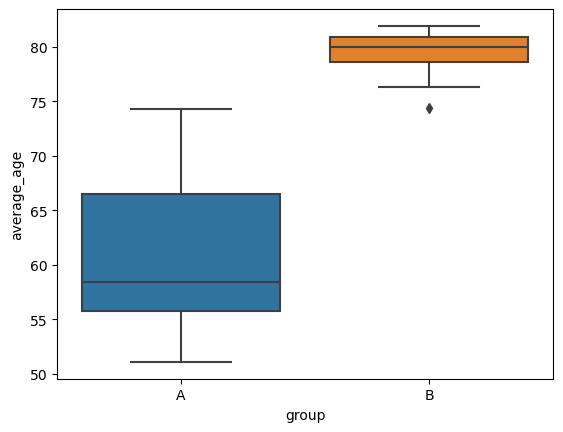

In [41]:
sns.boxplot(
    data=df,
    x="group",
    y='average_age'
    )

In [121]:
dT_A = df[df['group'] == 'A'].describe().T
dT_A['group'] = 'A'

dT_B = df[df['group'] == 'B'].describe().T
dT_B['group'] = 'B'

dT_AB = pd.concat([dT_B, dT_A])
dT_AB

,count,mean,std,min,25%,50%,75%,max,group
average_age,9.0,79.211111,2.42510,74.400,78.600,80.000,80.900,81.900,B
average_age,9.0,61.054444,7.89886,51.081,55.725,58.416,66.485,74.282,A


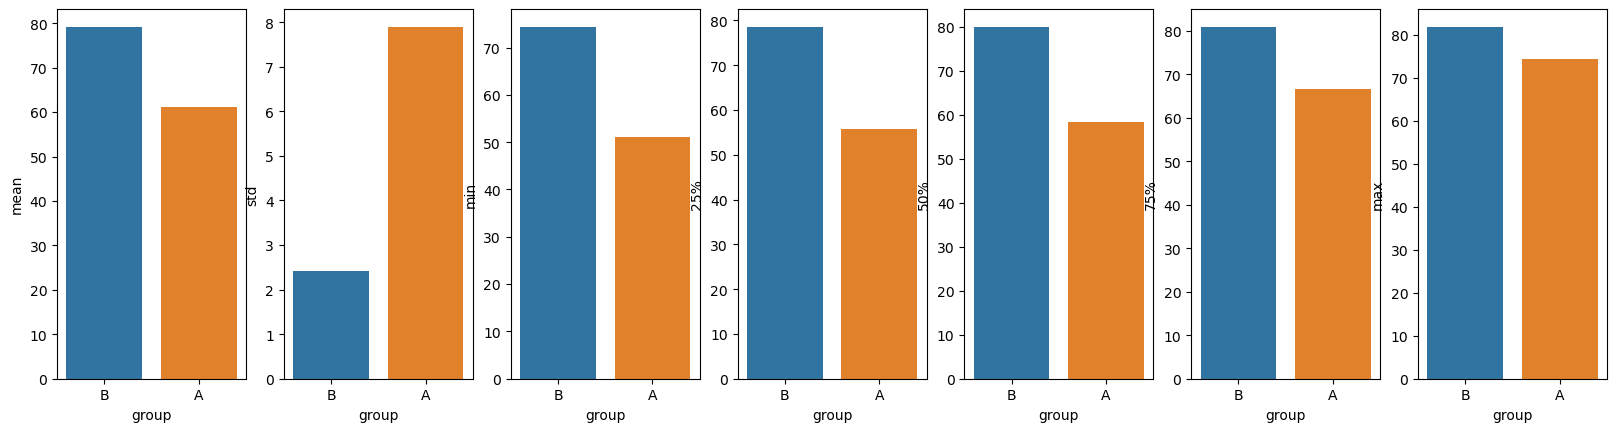

In [131]:
COLUMNS = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']

fig, axs = plt.subplots(ncols=7)
fig.set_figwidth(20)

for index, column in enumerate(COLUMNS):
    if column not in ['count', 'group']:
        sns.barplot(x=dT_AB['group'], y=dT_AB[column], ax=axs[index])

In [146]:
B_values, A_values = dT_AB[COLUMNS].values

cols = [f"{column}_delta" for column in COLUMNS]
vals = B_values - A_values

pd.DataFrame(vals, COLUMNS, columns=['b_minus_a_delta'])

,b_minus_a_delta
mean,18.156667
std,-5.473760
min,23.319000
25%,22.875000
50%,21.584000
75%,14.415000
max,7.618000


##### Conclusion

1. People in B leave 18 years longer then in A (average).
2. Variation of data bigger in A then in B (std).
3. Minimum life length in A 23 years less then in B.
4. 75% of people live longer in B then in A (14 years).
5. 50% of people live longer in B then in A (22 years).
6. 25% of people live longer in B then in A (23 years).